# Lecture 7 - CME 193 - scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is a library that allows you to do machine learning, that is, make predictions from data, in Python. There are four basic machine learning tasks:

 1. Regression: predict a number from datapoints, given datapoints and corresponding numbers
 2. Classification: predict a category from datapoints, given datapoints and corresponding numbers
 3. Clustering: predict a category from datapoints, given only datapoints
 4. Dimensionality reduction: make datapoints lower-dimensional so that we can visualize the data

Here is a [handy flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of when to use each technique.

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [22]:
from sklearn import datasets

In [27]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
import sklearn.metrics as metrics

## Regression
Abalone are a type of edible marine snail, and they have internal rings that correspond to their age (like trees). In the following, we will use a dataset of [abalone measurements](https://archive.ics.uci.edu/ml/datasets/abalone). It has the following fields:

    Sex / nominal / -- / M, F, and I (infant) 
    Length / continuous / mm / Longest shell measurement 
    Diameter	/ continuous / mm / perpendicular to length 
    Height / continuous / mm / with meat in shell 
    Whole weight / continuous / grams / whole abalone 
    Shucked weight / continuous	/ grams / weight of meat 
    Viscera weight / continuous / grams / gut weight (after bleeding) 
    Shell weight / continuous / grams / after being dried 
    Rings / integer / -- / +1.5 gives the age in years 

Suppose we are interested in predicting the age of the abalone given their measurements. This is an example of a regression problem.

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                    header=None, names=['sex', 'length', 'diameter', 'height',
                                        'weight', 'shucked_weight',
                                        'viscera_weight', 'shell_weight', 'rings'])

In [3]:
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


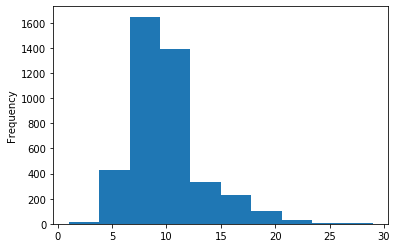

In [6]:
df['rings'].plot(kind='hist');

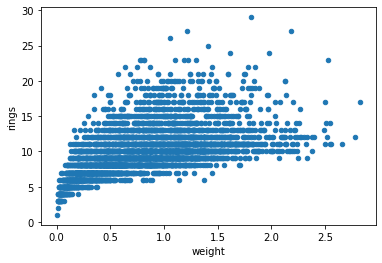

In [7]:
df.plot('weight', 'rings', kind='scatter');

In [8]:
X = df[['weight']].to_numpy()
y = df['rings'].to_numpy()

In [9]:
X

array([[0.514 ],
       [0.2255],
       [0.677 ],
       ...,
       [1.176 ],
       [1.0945],
       [1.9485]])

In [10]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [12]:
model = linear_model.LinearRegression()
model.fit(X,y)
print(model.coef_, model.intercept_)

[3.55290921] 6.989238807755703


In [13]:
print(model.score(X, y))

0.29202100292591804


In [14]:
model.predict(np.array([[1.5], [2.2]]))

array([12.31860263, 14.80563908])

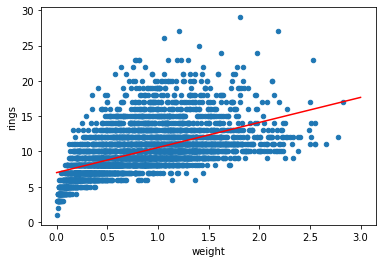

In [15]:
df.plot('weight', 'rings', kind='scatter')

weight = np.linspace(0, 3, 10).reshape(-1, 1)
plt.plot(weight, model.predict(weight), 'r')

In [17]:
df['root_weight'] = np.sqrt(df['weight'])

In [18]:
X = df[['weight', 'root_weight']].to_numpy()
y = df['rings'].to_numpy()
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
weight = np.linspace(0, 3, 100).reshape(-1, 1)
root_weight = np.sqrt(weight)

features = np.hstack((weight, root_weight))

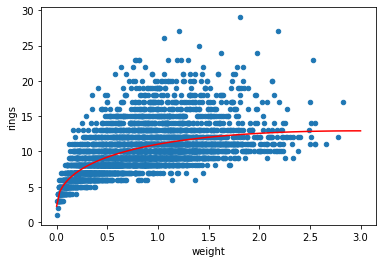

In [20]:
df.plot('weight', 'rings', kind='scatter')

plt.plot(weight, model.predict(features), 'r')

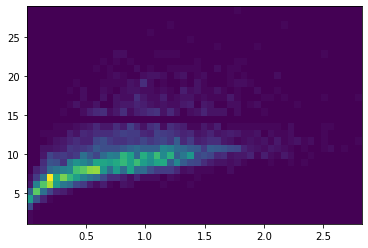

In [21]:
plt.hist2d(df['weight'], df['rings'], bins=(50, 30));

## Classification

Another example of a machine learning problem is classification. Here we will use a dataset of flower measurements from three different flower species of *Iris* (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). We aim to predict the species of the flower. Because the species is not a numerical output, it is not a regression problem, but a classification problem.

In [23]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
X = iris.data[:, :2]
y = iris.target_names[iris.target]

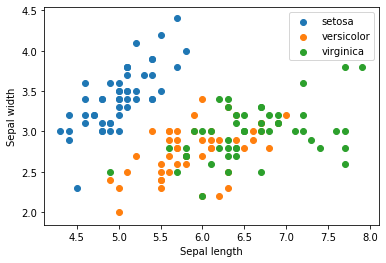

In [25]:
for name in iris.target_names:
    plt.scatter(X[y == name, 0], X[y == name, 1], label=name)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend();

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [29]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
X_test

array([[5.8, 2.8],
       [6. , 2.2],
       [5.5, 4.2],
       [7.3, 2.9],
       [5. , 3.4],
       [6.3, 3.3],
       [5. , 3.5],
       [6.7, 3.1],
       [6.8, 2.8],
       [6.1, 2.8],
       [6.1, 2.6],
       [6.4, 3.2],
       [6.1, 2.8],
       [6.5, 2.8],
       [6.1, 2.9],
       [4.9, 3.6],
       [6. , 2.9],
       [5.5, 2.6],
       [4.8, 3. ],
       [5.4, 3.9],
       [5.6, 2.8],
       [5.6, 3. ],
       [4.8, 3.4],
       [4.4, 2.9],
       [6.2, 2.8],
       [4.6, 3.6],
       [5.1, 3.8],
       [6.2, 2.9],
       [5. , 2.3],
       [5. , 3.4]])

In [31]:
model.predict(X_test)

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype='<U10')

## Evaluating your model

In [32]:
np.mean(model.predict(X_test) == y_test)  # Accuracy

0.6666666666666666

In [34]:
metrics.accuracy_score(model.predict(X_test), y_test)

0.6666666666666666

In [35]:
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.38      0.71      0.50         7
   virginica       0.67      0.33      0.44        12

    accuracy                           0.67        30
   macro avg       0.68      0.68      0.65        30
weighted avg       0.72      0.67      0.66        30



In [36]:
# Cross validation
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.7       , 0.76666667, 0.73333333, 0.86666667, 0.76666667])

In [37]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")

Accuracy: 0.7666666666666667 (+/- 0.05577733510227173)


### Use Full data

In [38]:
X = iris.data
y = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



# 1. Exercise
Try to fit some of the models in the following cell to the same data. Compute the relevant statistics (e.g. accuracy, precision, recall). Look up the documentation for the classifier, and see if the classifier takes any parameters. How does changing the parameter affect the result?

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [40]:
X = iris.data
y = iris.target_names[iris.target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(metrics.classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

